In [ ]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Embedding, LSTM, SimpleRNN, Dense
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.optimizers import Adam
import tensorflow as tf
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
random.seed(0)

max_features = 10000
padding_len = 250

def get_train_test(padding_len=250):
  (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features, skip_top=10)

  x_train = x_train[:5000]
  y_train = y_train[:5000]


  x_train = sequence.pad_sequences(x_train, maxlen=padding_len, padding="pre")
  x_test = sequence.pad_sequences(x_test, maxlen=padding_len, padding="pre")

  return x_train, x_test, y_train, y_test

In [ ]:
def build_model(recurrent_layer, units=5):
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(recurrent_layer(units))
    model.add(Dense(1, activation='sigmoid'))
    lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
      0.0001,
      decay_steps=782,
      decay_rate=1,
      staircase=False)
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr_schedule), metrics=['accuracy'])

    return model

In [ ]:
def plot_costs(train_cost, test_cost, title, axis, pos):
  n = len(train_cost)
  axis[pos].plot(range(n), train_cost, label="Train cost")
  axis[pos].plot(range(n), test_cost, label="Test cost")
  axis[pos].set_title(title)
  axis[pos].set_xlabel("Epochs")
  if (pos == 0):
    axis[pos].set_ylabel("Cost")
  axis[pos].legend()

import warnings
warnings.filterwarnings('ignore')

SimpleRNN, units=2 , accuracy:  0.61
SimpleRNN, units=5 , accuracy:  0.81
SimpleRNN, units=11 , accuracy:  0.81
LSTM, units=2 , accuracy:  0.81
LSTM, units=5 , accuracy:  0.81
LSTM, units=11 , accuracy:  0.82


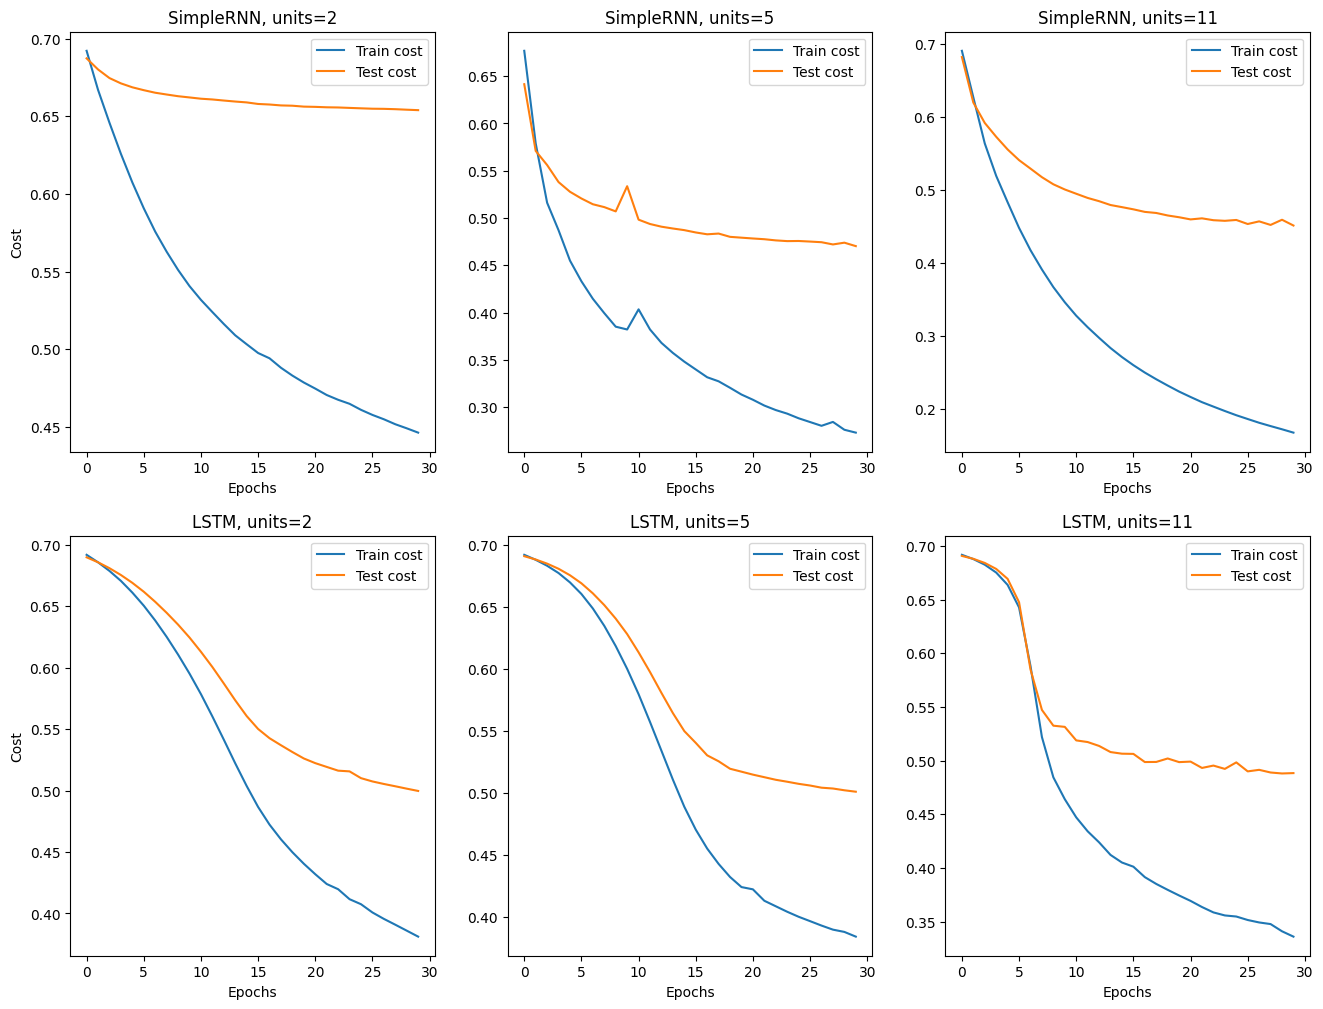

In [ ]:
x_train, x_test, y_train, y_test = get_train_test()
epochs = 30
batch_size = 64
figure, axes = plt.subplots(2, 3, figsize=(16, 12))
unit_list = [2, 5, 11]
RNN_type_list = ["SimpleRNN", "LSTM"]

for i in range(len(RNN_type_list)):
  if (RNN_type_list[i] == "LSTM"):
    RNN = LSTM
  else:
    RNN = SimpleRNN
  for j in range(len(unit_list)):
    units = unit_list[j]
    model = build_model(RNN, units=units)
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
    score, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

    title = RNN_type_list[i]
    title += ", units=" + str(units)
    print(title, ", accuracy: ", "%.2f" % acc)
    plot_costs(history.history['loss'], history.history['val_loss'], title, axes[i], j)

Padding length=250 , accuracy:  0.81
Padding length=20 , accuracy:  0.70
Padding length=10 , accuracy:  0.68


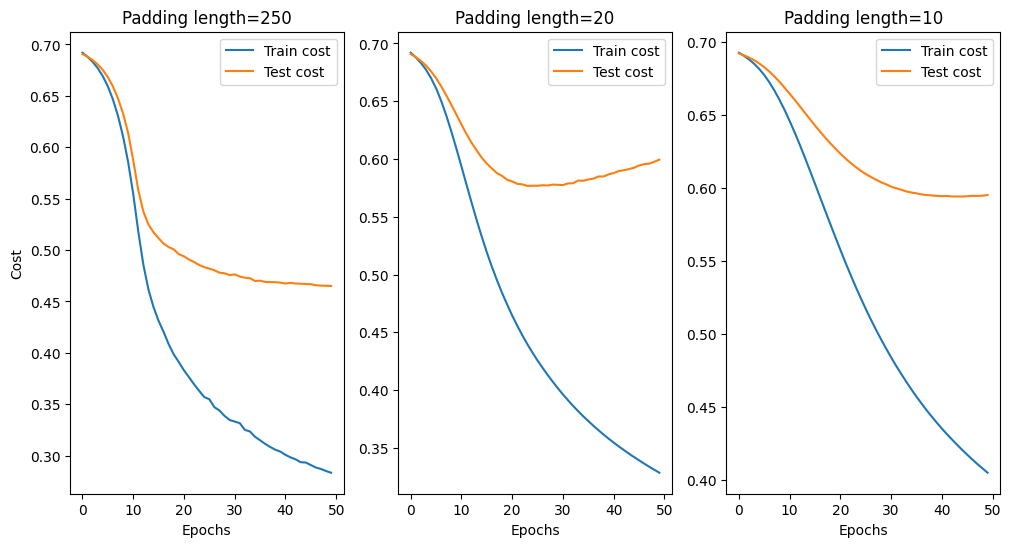

In [ ]:
epochs = 50
batch_size = 64
figure, axis = plt.subplots(1, 3, figsize=(12, 6))
units = 5
padding_len_list = [250, 20, 10]

for i in range(len(padding_len_list)):
  padding_len = padding_len_list[i]
  x_train, x_test, y_train, y_test = get_train_test(padding_len)
  model = build_model(LSTM, units=units)
  history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), verbose=0)
  _, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)

  title = "Padding length=" + str(padding_len)
  print(title, ", accuracy: ", "%.2f" % acc)
  plot_costs(history.history['loss'], history.history['val_loss'], title, axis, i)